# Inferential Statistics

Inferential statistics allow drawing conclusions, make predictions, and generalize findings about a large population based on data collected from a smaller sample. It uses techniques like hypothesis testing to quantify the uncertainty and to tests relationships between variables. 

## Population vs Sample

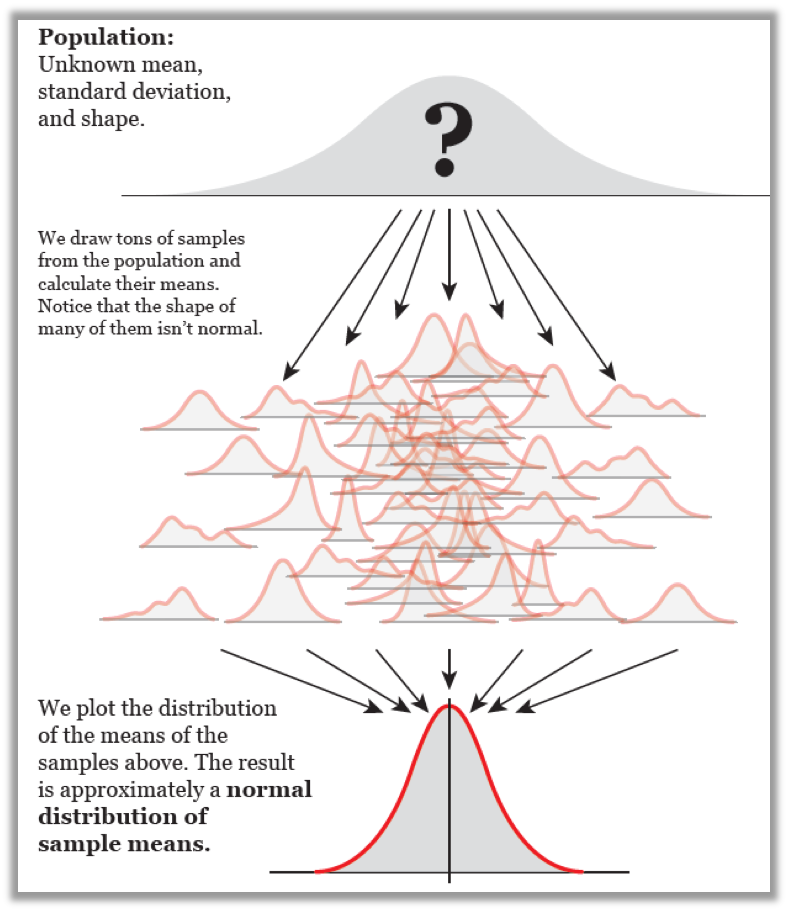

It means that it would be quite normal if our sample is located somewhere close to the populations median.

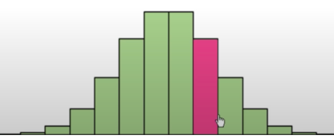

What if it is located far from the populations median?

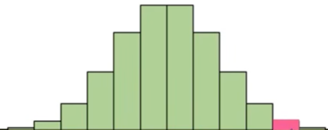

### Confidence Intervals

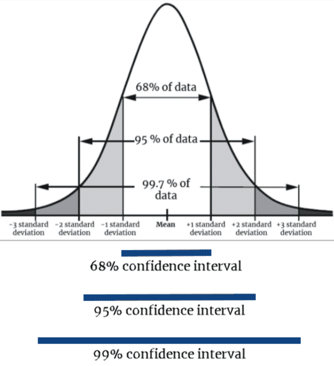

## Code Examples

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sbn

In [3]:
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [4]:
# A pack I have created earlier
import MyStatPack
from MyStatPack import module1, module2, module3, module4

### Generate Random Samples
I am using the function I created earlier and store in the package MyStatPack, imported here. I create two data frames: df1 and df2, which will be used for simulation and demonstration. Both contain normally distributed data (created by the function bell()). <br>
You can try same statistical operations with data set of random integers, created by function data() to experience the differece.

In [5]:
# call function data(from, to, rows, colums) from __init__.py to create a dataframe with random numbers
df1 =  MyStatPack.bell(50, 10, 100, 5)
df1.head(10)

,col0,col1,col2,col3,col4
0,40.362701,65.876131,55.725052,58.892849,43.209372
1,54.697257,45.119082,67.589956,49.969602,68.609902
2,62.428966,41.951530,56.503550,58.375756,57.266114
3,43.439461,44.923447,51.257784,49.755680,63.681971
4,65.395420,64.861346,52.577045,55.458861,47.183856
5,53.899521,54.288558,56.566971,48.107548,42.813004
6,52.353284,47.341813,78.677198,50.226209,24.740114
7,52.325512,43.363467,47.342788,55.581580,57.571708
8,49.419959,46.602056,37.929001,49.688686,54.814135
9,48.990373,64.182644,48.715806,35.567998,31.127778


<Axes: xlabel='col0', ylabel='Count'>

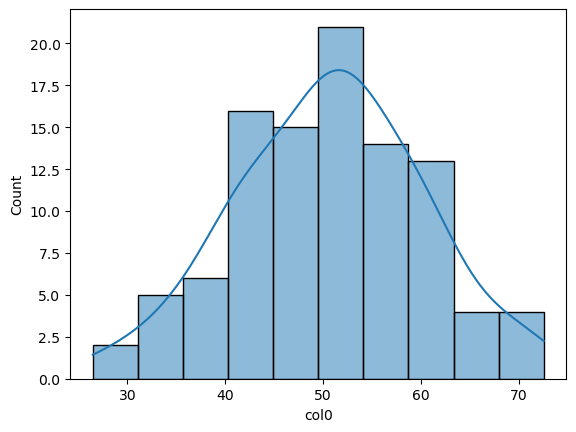

In [6]:
# first sample's histogram
sbn.histplot(df1.col0, kde=True, bins=10)

In [7]:
# second data frame
df2 =  MyStatPack.bell(50, 10, 100, 3)
df2.sample(10)

,col0,col1,col2
41,54.512150,45.064987,33.559918
57,40.397319,35.287999,59.139071
70,64.030689,53.490805,46.534096
62,43.633581,49.914674,53.496860
63,46.826527,49.497042,44.582618
32,48.490696,55.674949,38.136019
86,37.351231,26.935563,48.429244
21,49.377026,29.514440,66.661923
25,56.633537,57.975870,52.571765
24,52.067838,50.277266,46.645633


<Axes: xlabel='col0', ylabel='Count'>

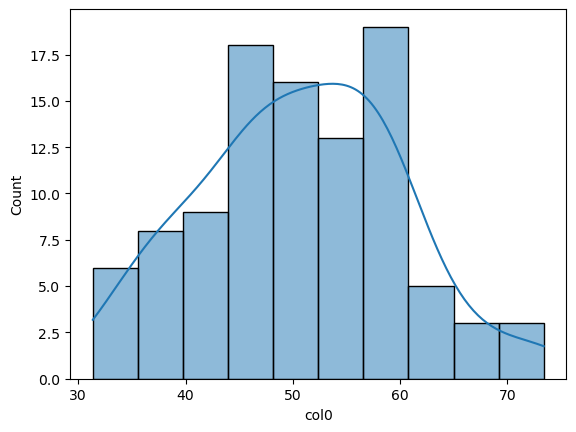

In [8]:
# second sample histogram
sbn.histplot(df2.col0, kde=True, bins=10)

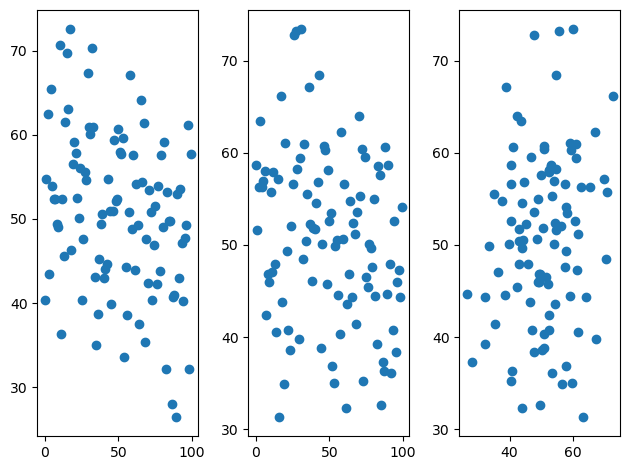

In [9]:
# scatter plot of both
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3)
x = np.arange(0, 100)

axes[0].scatter(x, df1.col0)
axes[1].scatter(x, df2.col0)
axes[2].scatter(df1.col0, df2.col0)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show() 

## Test Hypotheses

A hypothesis is a specific statement of prediction. It must be measured or tested.<br>
In statistics, testing hypotheses means proving that the result of the analysis is not just occasional, but based on solid evidences. 

Let's formulate a hypothesis that df1 and df2 are statistically related in a way they depend from each other.<br>It means our two hypotheses would be:
- __Ha__: df1 depends on df2
- __Ho__: any visible dependence is just a random, no significant factors that distinguish them

We try to _reject Ho_ and to make  _conclusions based on Ha_. <br>

We can calculate some statistics to check that, such as __t-test__ and __p-value__.<br>

A __t-test__ determines if there is a significant difference between the two groups, while the __p-value__ measures the _probability_ that this difference occurred by chance. The t-test produces a _t-statistic_ (ratio of difference to variation), and the _p-value indicates whether that t-statistic is statistically significant_, assuming Ho is true.


### Treshold  alpha

The p-value is compared against a pre-defined __threshold alpha__. <br>

If p > alpha, the Ho cannot be regected, but if p<=alpha, it can be rejected, as our case and other cases more extreme than it have too small probability to be very similar.

In [ ]:
# typically alpha is given value 0.05, which means 5% of the data in the set
alpha = 0.05 

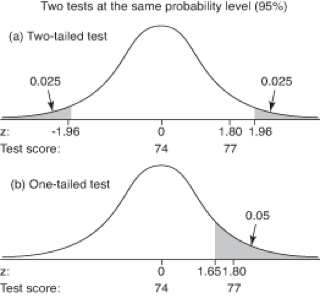

### T-Test

The T-Test is a statistical hypothesis testing method for comparing two or more datasets. It estimates the  differences between them, based on comparing their means. <br>
The test is appropriate for working with __normally distributed numeric datasets__ with similar but unidentified variances.

In [10]:
t, p = stats.ttest_ind(df1.col0, df2.col0)

In [11]:
# large t-value (far from 0) indicates a large difference. 
t

np.float64(-0.04341494688956123)

In [12]:
# small p-value indicates the result is unlikely to be due to chance, 
# leading to the rejection of the null hypothesis
p

np.float64(0.9654145138747873)

The P-Value is the probability measure that an observed difference could have occurred by mere chance. The lower the p-value, the greater the statistical significance of the observed difference. <br>

In this case, __p > alpha__, the difference between te sets is considered statistically insignificant, therefore we cannot reject the null hypothesis Ho.

For two identical datasets p=1.0, for totally different datasets it is p=0.0.

In [ ]:
# contra-example: two identical datasets
t, p = stats.ttest_ind(df1.col0, df1.col1)

In [ ]:
print('t=', t, ' p=', p)

!! Try with other data to see different results

In summary, the t-test quantifies the "gap" between groups, while the p-value assesses the strength of evidence against the hypothesis that the gap is merely random noise. 

In [ ]:
# Create a plot for engine-size and price
sbn.regplot(x="col0", y="col1", data=df1)

### Errors
- __Type 1 Error__: Ho rejected incorrectly -> __False Positive__ error
- __Type 2 Error__: Ho should have been rejected, but it isn't -> __False Negative__ error

## Correlation

While t-test measures the similarity between two data sets, based on their mean and variance (standard deviation), the correlation statistics measure what exactly dependenses the sets have. For example, correlations can show linearity or non-linear regression between the distribution of the items of the datasets. <br>
The functions that can estimate the correlation are different for different types abnd distributions of data.

### Numeric Data - Pearson
We use __Pearson correlation__ function for numeric values of two sets, each with normal distribution.

In [13]:
corr1 = stats.pearsonr(df1.col0, df1.col1)
corr1

PearsonRResult(statistic=np.float64(0.08092518168318114), pvalue=np.float64(0.42348403417701774))

In [14]:
corr1 = stats.pearsonr(df1.col1, df1.col1)
corr1

PearsonRResult(statistic=np.float64(1.0), pvalue=np.float64(0.0))

#### Visualisation

In [15]:
# correrlation matrix
cmat = df1.corr()
cmat

,col0,col1,col2,col3,col4
col0,1.000000,0.080925,0.073360,0.062632,0.116928
col1,0.080925,1.000000,0.061084,-0.071520,-0.094691
col2,0.073360,0.061084,1.000000,0.053787,0.002456
col3,0.062632,-0.071520,0.053787,1.000000,0.083475
col4,0.116928,-0.094691,0.002456,0.083475,1.000000


<Axes: >

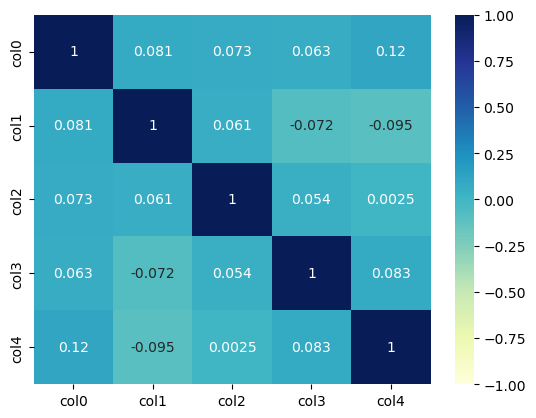

In [16]:
# correlation heatmap
sbn.heatmap(cmat, cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

### Categorical Rank Correltion - Spearman
No need to have normal distribution. We generate two dummy datasets of random ints.<br>
We use __Spearman correlation__ function.

In [17]:
# first
do1 =  MyStatPack.data(1, 10, 20, 4)
do1.head(10)

,col0,col1,col2,col3
0,1,7,7,7
1,3,9,1,8
2,5,1,6,7
3,2,3,6,7
4,2,9,7,6
5,5,1,3,5
6,1,9,3,6
7,4,8,1,6
8,8,9,6,9
9,4,5,7,3


In [21]:
# second
do2 =  MyStatPack.data(1, 5, 20, 4)
do2.head(10)

,col0,col1,col2,col3
0,4,4,1,2
1,3,3,4,1
2,1,3,2,1
3,2,4,3,4
4,1,3,4,1
5,4,4,1,4
6,3,2,1,1
7,3,4,4,4
8,1,3,3,4
9,3,2,4,3


In [25]:
alpha = 0.05

In [26]:
corr2, p = spearmanr(do1.col0, do1.col3)
print('Correlation coeficient =', corr2)
print('p-value = ', p)

Correlation coeficient = -0.18984626122787487
p-value =  0.4227373911052179


In [27]:
# interpret the significance
if p > alpha:
	print('Samples are uncorrelated (fail to reject Ho)')
else:
	print('Samples are correlated (reject Ho)')


Samples are uncorrelated (fail to reject Ho)


#### Visualisation

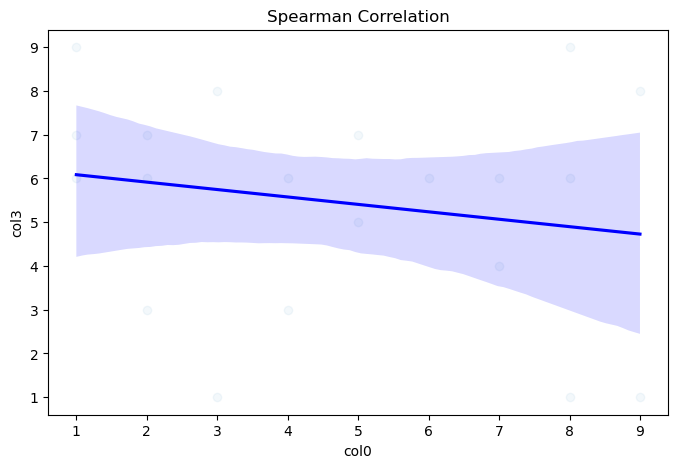

In [28]:
# scatter plot with trendline
plt.figure(figsize=(8, 5))
sbn.regplot(x='col0', y='col3', data=do1, scatter_kws={'alpha':alpha}, line_kws={'color': 'blue'})
plt.title('Spearman Correlation')
plt.show()

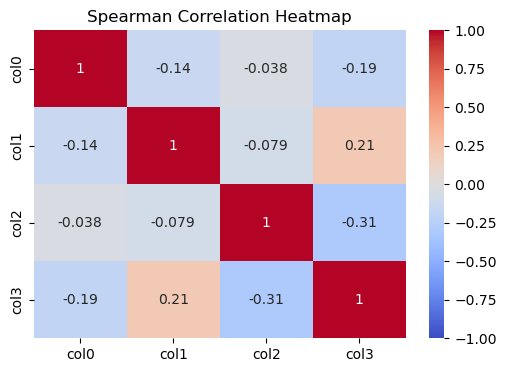

In [29]:
# correlation heatmap
plt.figure(figsize=(6, 4))
sbn.heatmap(do1.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()

#### Correlation Examples

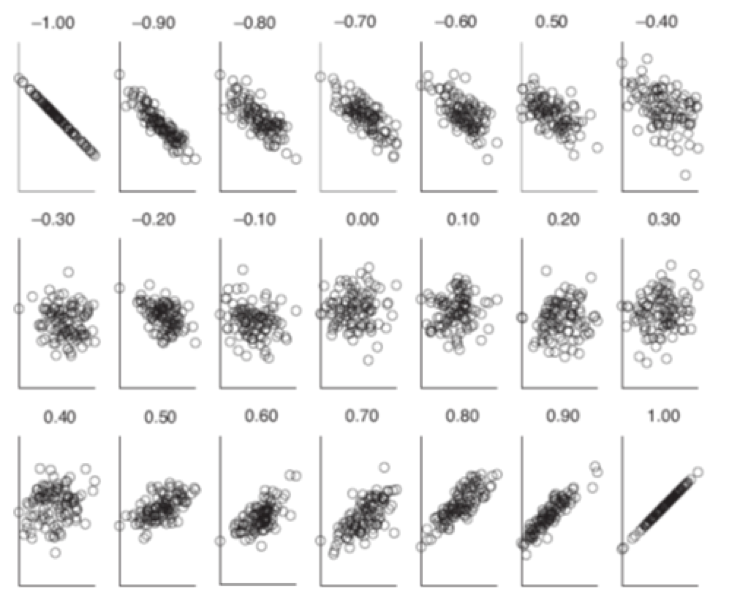

### Categorical Nominal Correlation - Chi-Square
We use __chi-square test__.

The Chi-Square Test is a statistical method used to find out if there is a significant association between two categorical variables.
It compares the observed frequencies (the actual collected data) to the expected frequencies, which would have been expected if there was no relationship. If there is a significan difference between these frequencies, there is no relationship. <br>
We test it with the clean car data.

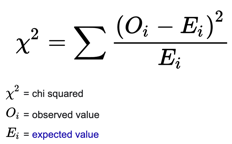

In [30]:
df = pd.read_csv('../data/carclean.csv', sep=',')

In [31]:
df.head()

,Unnamed: 0,mpg,milage,maketype,car_id,region,price,make,type,scrapedate,alder,ccm2,doors,aldercat,navn
0,0,21.6,18000.0,"Toyota Yaris 1,5 VVT-iE T3 Smart 5d",5559177,København,169900.0,Toyota,Yaris,2022-11-08 22:29:38.772658,3,1500.0,5d,veteran,Region Hovedstaden
1,1,20.4,254000.0,"Ford Ka 1,2 Trend 3d",4367512,Nordjylland,34900.0,Ford,Ka,2022-11-08 22:29:38.772658,11,1200.0,3d,veteran,Region Nordjylland
2,2,NaN,51000.0,"Ford Mustang 4,7 V8 289cui. 2d",5506605,København,245000.0,Ford,Mustang,2022-11-08 22:29:38.772658,57,4700.0,2d,veteran,Region Hovedstaden
3,3,13.9,246000.0,"Toyota Avensis 1,8 VVT-i Sol stc. 5d",5518799,København,29999.0,Toyota,Avensis,2022-11-08 22:29:38.772658,18,1800.0,5d,veteran,Region Hovedstaden
4,4,17.9,97000.0,"Volvo V40 2,0 T2 122 Momentum Eco 5d",5604536,Nordjylland,199900.0,Volvo,V40,2022-11-08 22:29:38.772658,5,2000.0,5d,veteran,Region Nordjylland


In [32]:
group = df.groupby(['region','make'])['car_id'].count()
group

region                 make  
Fyn                    Ford      132
                       Toyota    110
                       Volvo      18
København              Ford      227
                       Toyota    206
                       Volvo      38
Lolland-Falster        Ford        8
                       Toyota      4
                       Volvo       2
Nordjylland            Ford      155
                       Toyota     90
                       Volvo      22
Nordsjælland           Ford       76
                       Toyota     60
                       Volvo      22
Syd- og Sønderjylland  Ford      326
                       Toyota    150
                       Volvo      34
Syd- og Vestsjælland   Ford      263
                       Toyota    178
                       Volvo      45
Vestjylland            Ford      110
                       Toyota     53
                       Volvo       8
Østjylland             Ford      282
                       Toyota    136
        

In [33]:
# Based on observed values, we calculate the expected values and the resulting chi2 statistic and p
def chi2test(var1, var2):
    # Creating a contingency table of school and sex
    contingency_table = pd.crosstab(var1, var2)
    print('observed values\n', contingency_table)
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('\nexpected values\n', expected.astype(int))
    print('\nchi2=', chi2, '\np=', p, '\n')
    print('degrees of freedom ',dof )
    
    if p<0.05:
        print('significant correlation, reject Ho')
    else:
        print('insignificant correlation, cannot reject Ho')
    return chi2, p, dof

In [34]:
chi2, p, dof = chi2test(df.region, df.make)

observed values
 make                   Ford  Toyota  Volvo
region                                    
Fyn                     132     110     18
København               227     206     38
Lolland-Falster           8       4      2
Nordjylland             155      90     22
Nordsjælland             76      60     22
Syd- og Sønderjylland   326     150     34
Syd- og Vestsjælland    263     178     45
Vestjylland             110      53      8
Østjylland              282     136     66

expected values
 [[145  90  23]
 [263 164  42]
 [  7   4   1]
 [149  93  24]
 [ 88  55  14]
 [285 178  46]
 [272 170  43]
 [ 95  59  15]
 [270 169  43]]

chi2= 68.85761338676723 
p= 1.5805009359396458e-08 

degrees of freedom  16
significant correlation, reject Ho


In [35]:
alpha = 0.05

In [36]:
critical_value = stats.chi2.ppf(1 - alpha, dof)
critical_value

np.float64(26.296227604864242)

#### Visualisation

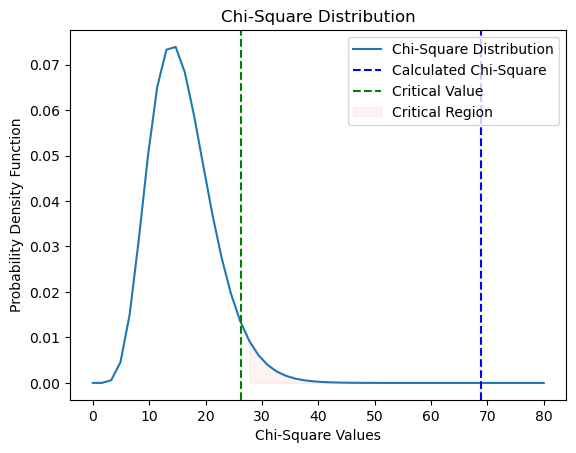

In [37]:
x = np.linspace(0, 80)
y = stats.chi2.pdf(x, dof)
plt.plot(x, y, label='Chi-Square Distribution')

plt.axvline(chi2, color='blue', linestyle='dashed', label='Calculated Chi-Square')
plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=alpha, label='Critical Region')


plt.title('Chi-Square Distribution')
plt.xlabel('Chi-Square Values')
plt.ylabel('Probability Density Function')
plt.legend()

plt.show()

In [ ]:
# test others
chi2, p = chi2test(df.doors, df.make)